In [2]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg

In [3]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import SCORERS, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [8]:
iris = load_iris()
logreg = LogisticRegression(max_iter=3000)
scores = cross_val_score(logreg, iris['data'], iris['target'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [9]:
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [10]:
scores.mean()

0.9733333333333334

In [13]:
res = cross_validate(logreg, iris['data'], iris['target'], return_train_score=True, cv=5)
res

{'fit_time': array([0.01007652, 0.01501417, 0.01000881, 0.01100993, 0.01101041]),
 'score_time': array([0.00100064, 0.00100064, 0.00100112, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [14]:
kfold = KFold(n_splits=5, shuffle=True)
stkfold = StratifiedKFold(n_splits=5, shuffle=True)

In [15]:
cross_val_score(logreg, iris['data'], iris['target'], cv=stkfold)

array([0.96666667, 1.        , 1.        , 0.96666667, 0.93333333])

In [16]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=loo)
scores.mean()

0.9666666666666667

In [17]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores.mean()

0.6722222222222222

In [19]:
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=rskfold)
scores.mean()

0.964

In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(iris['data'], iris['target'], stratify=iris['target'], random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, random_state=0)

In [21]:
param_grid = {'C':np.logspace(-2, 2, 5), 'gamma':np.logspace(-2, 2, 5)}
param_grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

In [23]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train_val, y_train_val)
grid.best_estimator_

SVC(C=10.0, gamma=0.01)

In [24]:
grid.score(X_test, y_test)

1.0

In [26]:
svc = SVC(C=10, gamma=0.1).fit(X_train, y_train)
svc.score(X_test, y_test)

1.0

In [27]:
grid.best_score_

0.9470355731225297

In [30]:
results = pd.DataFrame(grid.cv_results_).T
results

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.001004,0.001001,0.001001,0.000601,0.001001,0.000801,0.000801,0.000801,0.001001,0.001001,...,0.0006,0.000801,0.000401,0.001001,0.001201,0.000601,0.000801,0.001001,0.000801,0.001201
std_fit_time,0.000004,0.0,0.0,0.00049,0.000001,0.0004,0.0004,0.0004,0.0,0.0,...,0.00049,0.0004,0.000491,0.0,0.0004,0.00049,0.0004,0.0,0.0004,0.0004
mean_score_time,0.000399,0.0004,0.0006,0.000401,0.0004,0.0006,0.000601,0.0002,0.0004,0.0006,...,0.0004,0.0002,0.000601,0.0004,0.0006,0.0004,0.0002,0.0,0.0004,0.0002
std_score_time,0.000489,0.00049,0.00049,0.000491,0.00049,0.00049,0.00049,0.0004,0.00049,0.00049,...,0.00049,0.0004,0.00049,0.00049,0.00049,0.00049,0.000401,0.0,0.00049,0.0004
param_C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,100.0
param_gamma,0.01,0.1,1.0,10.0,100.0,0.01,0.1,1.0,10.0,100.0,...,0.01,0.1,1.0,10.0,100.0,0.01,0.1,1.0,10.0,100.0
params,"{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1.0}","{'C': 0.01, 'gamma': 10.0}","{'C': 0.01, 'gamma': 100.0}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1.0}","{'C': 0.1, 'gamma': 10.0}","{'C': 0.1, 'gamma': 100.0}",...,"{'C': 10.0, 'gamma': 0.01}","{'C': 10.0, 'gamma': 0.1}","{'C': 10.0, 'gamma': 1.0}","{'C': 10.0, 'gamma': 10.0}","{'C': 10.0, 'gamma': 100.0}","{'C': 100.0, 'gamma': 0.01}","{'C': 100.0, 'gamma': 0.1}","{'C': 100.0, 'gamma': 1.0}","{'C': 100.0, 'gamma': 10.0}","{'C': 100.0, 'gamma': 100.0}"
split0_test_score,0.652174,0.652174,0.652174,0.565217,0.521739,0.652174,0.869565,0.826087,0.565217,0.521739,...,0.869565,0.869565,0.913043,0.956522,0.608696,0.869565,0.956522,0.956522,0.956522,0.608696
split1_test_score,0.652174,0.652174,0.652174,0.521739,0.434783,0.652174,0.913043,0.956522,0.521739,0.434783,...,0.956522,1.0,0.956522,0.913043,0.565217,1.0,0.956522,0.913043,0.913043,0.565217
split2_test_score,0.318182,0.318182,0.318182,0.318182,0.318182,0.681818,0.954545,0.909091,0.318182,0.318182,...,1.0,0.954545,0.954545,0.863636,0.545455,0.954545,0.954545,0.954545,0.863636,0.545455


In [37]:
scores = np.array(results.T['mean_test_score'].astype('float')).reshape(5, 5)
scores

array([[0.58814229, 0.58814229, 0.57905138, 0.5083004 , 0.40948617],
       [0.73359684, 0.9201581 , 0.91106719, 0.5083004 , 0.40948617],
       [0.90197628, 0.92885375, 0.93754941, 0.91897233, 0.54426877],
       [0.94703557, 0.93754941, 0.93754941, 0.91936759, 0.57114625],
       [0.93754941, 0.94624506, 0.91936759, 0.91936759, 0.57114625]])

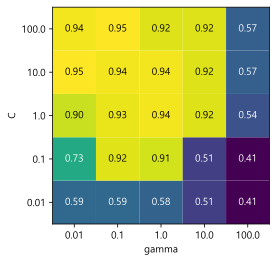

In [38]:
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')

In [39]:
param_grid = [{'kernel':['rbf'], 'C':np.logspace(-2, 3, 6), 'gamma':np.logspace(-2, 2, 5)},
{'kernel':['linear'], 'C':np.logspace(-2, 3, 6)}]

In [40]:
grid = GridSearchCV(SVC(), param_grid=param_grid, return_train_score=True, n_jobs=-1)
grid.fit(X_train_val, y_train_val)
grid.best_estimator_

SVC(C=10.0, gamma=0.01)

In [41]:
results = pd.DataFrame(grid.cv_results_).T
results

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.002002,0.002002,0.001401,0.001201,0.001201,0.001602,0.001001,0.001001,0.001201,0.001601,...,0.001201,0.001201,0.001401,0.001601,0.001001,0.001001,0.000801,0.000801,0.001001,0.000601
std_fit_time,0.0,0.000633,0.000491,0.0004,0.000401,0.00049,0.0,0.000001,0.000401,0.000491,...,0.0004,0.0004,0.00049,0.00049,0.0,0.0,0.0004,0.0004,0.000001,0.00049
mean_score_time,0.000601,0.000401,0.001,0.001001,0.001001,0.0004,0.001001,0.001001,0.000801,0.0002,...,0.0,0.0002,0.0004,0.0004,0.000601,0.0004,0.0004,0.0004,0.0002,0.0008
std_score_time,0.000491,0.000491,0.000001,0.000001,0.0,0.00049,0.000001,0.000001,0.0004,0.0004,...,0.0,0.0004,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.0004,0.0004
param_C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,1000.0,1000.0,1000.0,1000.0,0.01,0.1,1.0,10.0,100.0,1000.0
param_gamma,0.01,0.1,1.0,10.0,100.0,0.01,0.1,1.0,10.0,100.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100.0, 'kernel': 'rbf'}",...,"{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1000.0, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 1000.0, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 1000.0, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1.0, 'kernel': 'linear'}","{'C': 10.0, 'kernel': 'linear'}","{'C': 100.0, 'kernel': 'linear'}","{'C': 1000.0, 'kernel': 'linear'}"
split0_test_score,0.652174,0.652174,0.652174,0.565217,0.521739,0.652174,0.869565,0.826087,0.565217,0.521739,...,0.913043,0.956522,0.956522,0.608696,0.913043,0.869565,0.869565,0.956522,0.913043,0.956522
split1_test_score,0.652174,0.652174,0.652174,0.521739,0.434783,0.652174,0.913043,0.956522,0.521739,0.434783,...,0.956522,0.913043,0.913043,0.565217,0.913043,0.956522,1.0,0.956522,1.0,1.0


In [42]:
grid.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}